<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         55500 non-null  object 
 1   YearMonth      55500 non-null  object 
 2   BillingAmount  55500 non-null  float64
 3   ZScore         55500 non-null  float64
 4   IsAnomaly      55500 non-null  bool   
dtypes: bool(1), float64(2), object(2)
memory usage: 1.7+ MB


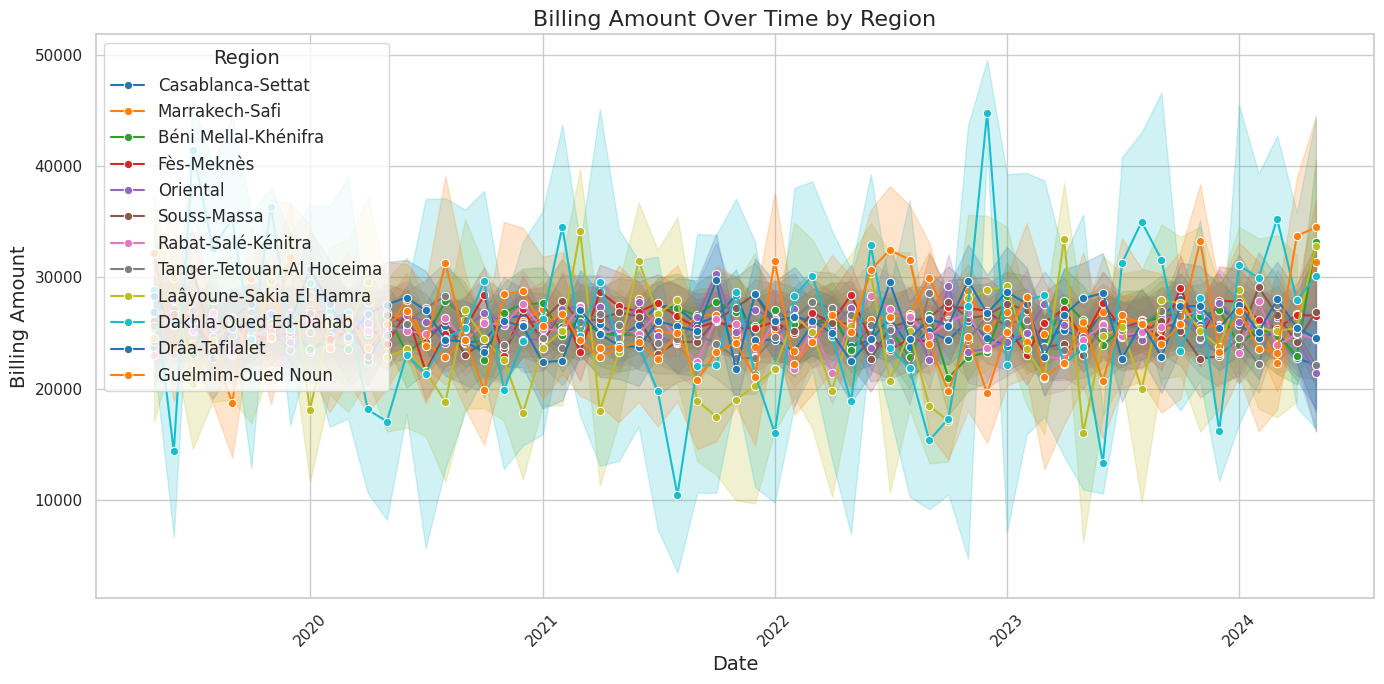

<ipython-input-4-64c1093b1d3d>:55: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


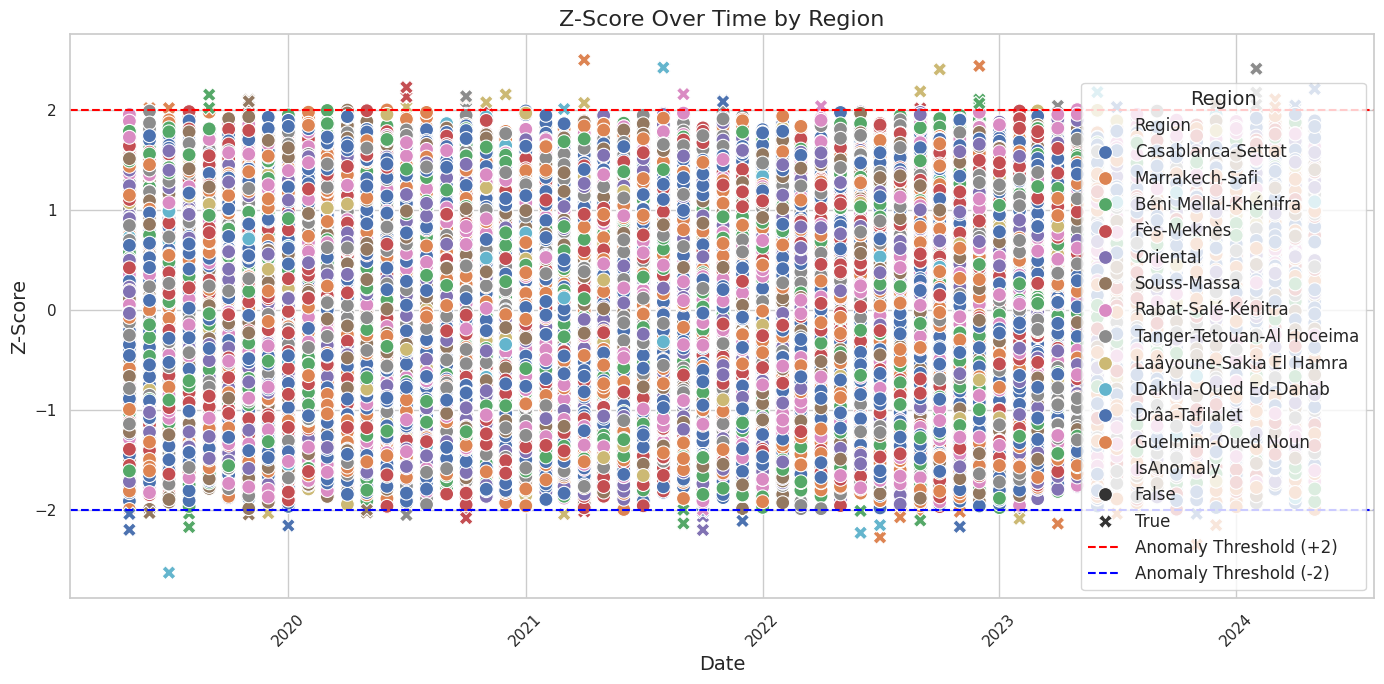

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "part-m-00000.csv"
df = pd.read_csv(file_path)
df.info()


df["YearMonth"] = pd.to_datetime(df["YearMonth"])


sns.set_theme(style="whitegrid")


def plot_billing_amount(dataframe):
    plt.figure(figsize=(14, 7))
    sns.lineplot(
        data=dataframe,
        x="YearMonth",
        y="BillingAmount",
        hue="Region",
        marker="o",
        palette="tab10"
    )
    plt.title("Billing Amount Over Time by Region", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Billing Amount", fontsize=14)
    plt.legend(title="Region", fontsize=12, title_fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


def plot_zscore(dataframe):
    plt.figure(figsize=(14, 7))
    sns.scatterplot(
        data=dataframe,
        x="YearMonth",
        y="ZScore",
        hue="Region",
        style="IsAnomaly",
        palette="deep",
        s=100
    )
    plt.axhline(y=2.0, color="red", linestyle="--", label="Anomaly Threshold (+2)")
    plt.axhline(y=-2.0, color="blue", linestyle="--", label="Anomaly Threshold (-2)")
    plt.title("Z-Score Over Time by Region", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Z-Score", fontsize=14)
    plt.legend(title="Region", fontsize=12, title_fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the functions to visualize the data
plot_billing_amount(df)
plot_zscore(df)
